# Comparative Analysis of Machine Learning Algorithms for Sign-MNIST Classification

### Question 2

Dataset : Sign-MNIST dataset


Source : https://www.kaggle.com/datasets/datamunge/sign-language-mnist

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

Now, reading the training and testing data into variables `train_data` and `test_data` respectively

In [3]:
%%time 
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

CPU times: user 2.75 s, sys: 468 ms, total: 3.22 s
Wall time: 3.33 s


Extracting lables from the data and dropping label column from the data

In [4]:
train_labels = train_data['label']
test_labels = test_data['label']

In [5]:
# dropping label column from the datasets
train_data.drop(columns=['label'], axis = 1, inplace = True)
test_data.drop(columns=['label'], axis = 1, inplace = True)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
# Split the dataset into training and validation data sets
split = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=42)

for train_index, val_index in split.split(train_data, train_labels):
    train_dataset_ = train_data.loc[train_index]
    labels_train_dataset = train_labels.loc[train_index]
    
    validation_dataset_ = train_data.loc[val_index]
    labels_validation_dataset = train_labels.loc[val_index]

In [8]:
train_dataset_.shape, labels_train_dataset.shape

((17455, 784), (17455,))

In [9]:
validation_dataset_.shape, labels_validation_dataset.shape

((10000, 784), (10000,))

In [10]:
test_data.shape, test_labels.shape

((7172, 784), (7172,))

In [11]:
# function to plot digits into an image format
def plot_data(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

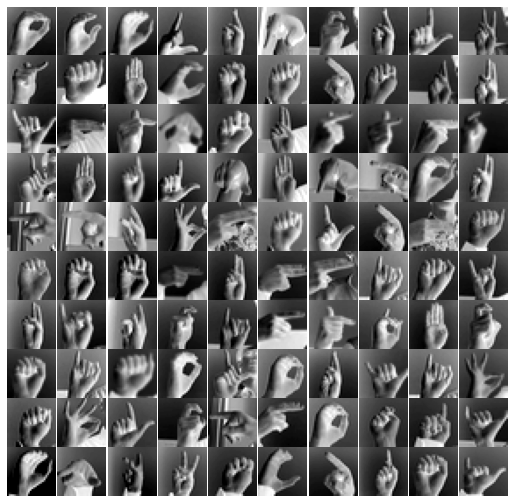

In [12]:
plt.figure(figsize=(9, 9))
for index_i, image_data in enumerate(train_dataset_.values[:100]):
    plt.subplot(10, 10, index_i + 1)
    plot_data(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

There are multiple number of features present in the data. We can use PCA to do dimentionality reduction

# Implementing PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=0.96)
pca.fit(train_data)

PCA(n_components=0.96)

In [15]:
# Transform training and testing data using PCA
train_dataset = pd.DataFrame(pca.transform(train_dataset_))
validation_dataset = pd.DataFrame(pca.transform(validation_dataset_))

In [16]:
train_dataset.shape, validation_dataset.shape

((17455, 135), (10000, 135))

It looks like the features are reduced to 135. Let's use the next possible square value, i.e. 144 for dimentionality reduction.

In [17]:
pca = PCA(n_components=144)
pca.fit(train_data)

PCA(n_components=144)

In [18]:
# Transform training and testing data using PCA
train_dataset = pd.DataFrame(pca.transform(train_dataset_))
validation_dataset = pd.DataFrame(pca.transform(validation_dataset_))

In [19]:
# Transform training and testing data using PCA
train_data = pd.DataFrame(pca.transform(train_data))
test_data = pd.DataFrame(pca.transform(test_data))

In [20]:
train_dataset.shape, validation_dataset.shape

((17455, 144), (10000, 144))

In [21]:
train_data.shape, test_data.shape

((27455, 144), (7172, 144))

In [22]:
train_dataset_recovered = pd.DataFrame(pca.inverse_transform(train_dataset))

In [23]:
# function to plot digits into an image format
def plot_transformed_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

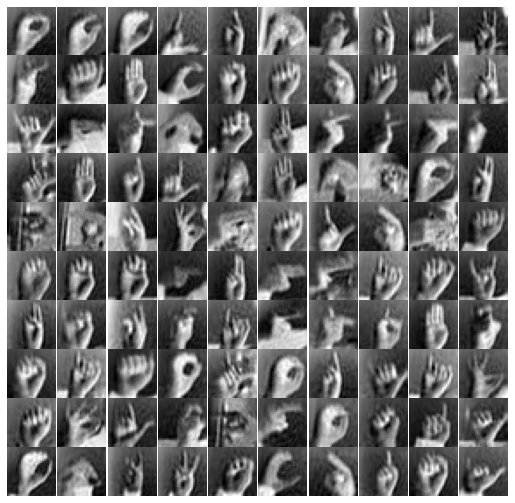

In [24]:
plt.figure(figsize=(9, 9))
for index_i, image_data in enumerate(train_dataset_recovered.values[:100]):
    plt.subplot(10, 10, index_i + 1)
    plot_transformed_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Now we will start with the classification

# 1. Multinomial Logistic Regression

In [25]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [26]:
#initializing a logistic regression model
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1)

In [27]:
# declaring a parameter grid 
param_grid = {
    'C': [0.5, 1, 5, 10],
    'penalty': ['l1', 'l2']
}


In [28]:
%%time 
grid_search = GridSearchCV(logistic_reg_model, param_grid, n_jobs=-1)

CPU times: user 114 µs, sys: 269 µs, total: 383 µs
Wall time: 402 µs


In [29]:
%%time 
grid_search.fit(train_data, train_labels)

CPU times: user 1min 40s, sys: 6.07 s, total: 1min 46s
Wall time: 4min 7s


GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', n_jobs=-1,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [30]:
# Print the best hyperparameters
MLR_parameters = grid_search.best_params_
print("Best hyperparameters:", MLR_parameters)

Best hyperparameters: {'C': 0.5, 'penalty': 'l1'}


In [31]:
# predicting the test data
test_labels_pred = grid_search.predict(test_data)

In [32]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       331
           1       1.00      0.81      0.90       432
           2       0.92      0.86      0.89       310
           3       0.83      0.75      0.79       245
           4       0.89      0.89      0.89       498
           5       0.61      0.91      0.73       247
           6       0.86      0.76      0.81       348
           7       0.83      0.66      0.74       436
           8       0.66      0.59      0.63       288
          10       0.56      0.38      0.45       331
          11       0.57      0.89      0.70       209
          12       0.65      0.63      0.64       394
          13       0.52      0.49      0.51       291
          14       0.99      0.63      0.77       246
          15       0.88      0.88      0.88       347
          16       0.61      0.74      0.67       164
          17       0.16      0.43      0.23       144
          18       0.27    

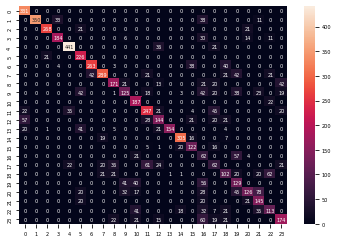

In [33]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [34]:
# Printing necessary evaluation metrics
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.6904746578906185
Precision Score: 0.6581148912437256
Recall Score: 0.6581148912437256
F1 Score: 0.6628488224410801


# 2. Support Vector Machines

## 2.1. Using Linear Kernal

In [35]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
# initialising parameter grid
param_grid = {'C':  [0.5, 1, 5, 10]}

In [37]:
linear_svm = SVC(kernel='linear', max_iter = 10000)

In [38]:
%%time 
grid_search = GridSearchCV(linear_svm, param_grid, n_jobs=-1,verbose=1)

CPU times: user 59 µs, sys: 0 ns, total: 59 µs
Wall time: 65.1 µs


In [39]:
%%time 
grid_search.fit(train_data, train_labels)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 17.2 s, sys: 420 ms, total: 17.7 s
Wall time: 1min 12s


GridSearchCV(estimator=SVC(kernel='linear', max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10]}, verbose=1)

In [40]:
# printing the best hyperparameters
SVM_linear_parameters = grid_search.best_params_
print("Best hyperparameters:", SVM_linear_parameters)

Best hyperparameters: {'C': 0.5}


In [41]:
# predicting labels on the test data
test_labels_pred = grid_search.predict(test_data)

In [42]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       331
           1       1.00      0.95      0.98       432
           2       0.73      0.99      0.84       310
           3       0.90      0.94      0.92       245
           4       0.89      1.00      0.94       498
           5       0.67      0.83      0.74       247
           6       0.84      0.89      0.86       348
           7       0.91      0.89      0.90       436
           8       0.74      0.82      0.78       288
          10       0.56      0.38      0.45       331
          11       0.52      0.49      0.50       209
          12       0.83      0.70      0.76       394
          13       0.90      0.64      0.75       291
          14       0.89      0.67      0.77       246
          15       0.90      1.00      0.95       347
          16       0.78      0.99      0.88       164
          17       0.34      0.71      0.46       144
          18       0.59    

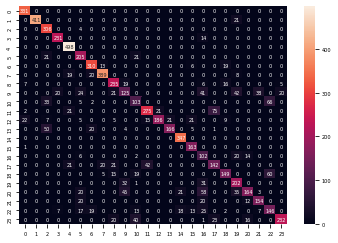

In [43]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [44]:
# printing evaluation parameters based on test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.7882158353650007
Precision Score: 0.7769102063580591
Recall Score: 0.7769102063580591
F1 Score: 0.7736024210303958


In the linear SVM model, we have used 3 regualarization parameters(C_values) for which C = 0.5 gave the best results on validation data. Thus, this model was used for further executing on the test data. For C= 0.5, the f1_score given by the model is 0.773

## 2.2. Using Polynomial Kernal

In [45]:
#importing libraries
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
# initializing parameter grid
param_grid = { 'C':  [0.5, 1, 5, 10], 
               'degree': [2, 3, 4], 
               'coef0': [0.1, 1, 10]
             }

In [47]:
# declaring a model
polynomial_svm = SVC(kernel='poly', max_iter = 10000)

In [48]:
%%time 
grid_search = GridSearchCV(polynomial_svm, param_grid, n_jobs=-1)

CPU times: user 161 µs, sys: 0 ns, total: 161 µs
Wall time: 191 µs


In [49]:
%%time 
grid_search.fit(train_data, train_labels)

CPU times: user 13.7 s, sys: 3.88 s, total: 17.6 s
Wall time: 5min 25s


GridSearchCV(estimator=SVC(kernel='poly', max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10], 'coef0': [0.1, 1, 10],
                         'degree': [2, 3, 4]})

In [50]:
# printing the best hyperparameters
SVM_polynomial_parameters = grid_search.best_params_
print("Best hyperparameters:", SVM_polynomial_parameters)

Best hyperparameters: {'C': 0.5, 'coef0': 1, 'degree': 3}


In [51]:
# predicting the test data
test_labels_pred = grid_search.predict(test_data)

In [52]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       331
           1       1.00      0.98      0.99       432
           2       0.83      0.99      0.90       310
           3       0.92      1.00      0.96       245
           4       0.92      1.00      0.96       498
           5       0.68      0.83      0.75       247
           6       0.92      0.93      0.93       348
           7       0.99      0.90      0.94       436
           8       0.79      0.83      0.81       288
          10       0.76      0.58      0.66       331
          11       0.89      0.90      0.89       209
          12       0.90      0.73      0.81       394
          13       0.89      0.65      0.75       291
          14       0.91      0.87      0.89       246
          15       1.00      1.00      1.00       347
          16       0.99      0.99      0.99       164
          17       0.31      0.52      0.39       144
          18       0.74    

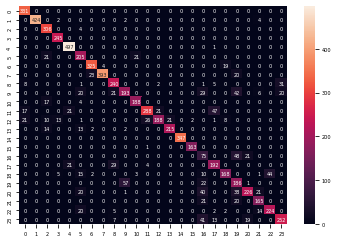

In [53]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [54]:
# printing scores on the test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.8546590237155586
Precision Score: 0.841606246514222
Recall Score: 0.841606246514222
F1 Score: 0.8432397552814402


We can see that the polynomial SVM model performed the best, with around 84% accuracy on the test data.

## 2.3. Using RBF Kernal

In [55]:
# using rbf kernal
rbf_svm = SVC(kernel='rbf', max_iter = 10000)

In [56]:
# printing parameter grid
param_grid = { 'C':  [0.5, 1, 5, 10], 
               'gamma': [0.01, 0.1, 1]
             }

In [57]:
grid_search = GridSearchCV(rbf_svm, param_grid, n_jobs=-1)

In [58]:
%%time 
grid_search.fit(train_data, train_labels)

CPU times: user 3min, sys: 270 ms, total: 3min 1s
Wall time: 16min 14s


GridSearchCV(estimator=SVC(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10], 'gamma': [0.01, 0.1, 1]})

In [59]:
%%time 
SVM_rbf_parameters = grid_search.best_params_
print("Best hyperparameters:", SVM_rbf_parameters)

Best hyperparameters: {'C': 5, 'gamma': 0.01}
CPU times: user 802 µs, sys: 0 ns, total: 802 µs
Wall time: 676 µs


In [60]:
# predicting the test labels using grid search
test_labels_pred = grid_search.predict(test_data)

In [61]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.00      0.00      0.00       432
           2       0.00      0.00      0.00       310
           3       0.00      0.00      0.00       245
           4       0.00      0.00      0.00       498
           5       0.00      0.00      0.00       247
           6       0.00      0.00      0.00       348
           7       0.00      0.00      0.00       436
           8       0.00      0.00      0.00       288
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       209
          12       0.00      0.00      0.00       394
          13       0.00      0.00      0.00       291
          14       0.00      0.00      0.00       246
          15       0.00      0.00      0.00       347
          16       0.00      0.00      0.00       164
          17       0.02      1.00      0.04       144
          18       0.00    

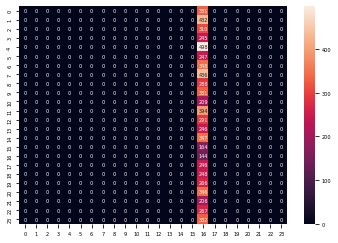

In [62]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [63]:
# printing scores on test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.00040312935382035047
Precision Score: 0.020078081427774678
Recall Score: 0.020078081427774678
F1 Score: 0.0007903892087478275


It seems like it reached the number of max iterations allowed. Hence the low accuracy rate of 0.07%
From the all the above 3 svm models, we can see that the polynomial SVM model performed the best, with around 84% accuracy on the test data. Also, one of the thing that I noticed is, the runtime for polynomial kernal is less than models with rbf kernal and linear kernal. 

# 3.Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# initialising the model
rfc_model = RandomForestClassifier()

In [66]:
# declaring the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
%%time 
grid_search = GridSearchCV(rfc_model, param_grid, n_jobs=-1, verbose=1)

CPU times: user 21 µs, sys: 25 µs, total: 46 µs
Wall time: 51.5 µs


In [68]:
%%time 
grid_search.fit(train_data, train_labels)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
CPU times: user 26.8 s, sys: 5.18 s, total: 32 s
Wall time: 7min 27s


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [69]:
# printing the best hyperparameters
rfc_parameters = grid_search.best_params_
print("Best hyperparameters:", rfc_parameters)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [70]:
# predicting the test labels
test_labels_pred = grid_search.predict(test_data)

In [71]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       331
           1       0.92      0.88      0.90       432
           2       0.85      0.92      0.88       310
           3       0.70      0.92      0.79       245
           4       0.87      0.88      0.87       498
           5       0.75      0.91      0.82       247
           6       0.89      0.79      0.84       348
           7       0.89      0.91      0.90       436
           8       0.64      0.61      0.63       288
          10       0.62      0.60      0.61       331
          11       0.86      0.94      0.90       209
          12       0.64      0.49      0.55       394
          13       0.56      0.41      0.47       291
          14       0.85      0.67      0.75       246
          15       0.93      0.97      0.95       347
          16       0.81      0.96      0.87       164
          17       0.30      0.60      0.40       144
          18       0.47    

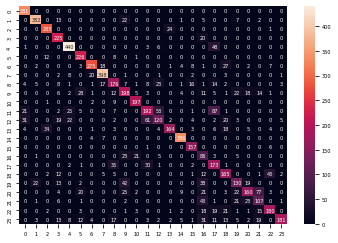

In [72]:
# plotting the confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [73]:
# printing scores on the test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.7501725813838396
Precision Score: 0.7367540435025097
Recall Score: 0.7367540435025097
F1 Score: 0.7347811082372997


The model does preety good job in fitting the data and gives good results on the test data(close to the polynomial SVM model.) Also, the run time was very less compared to the other SVM models. 
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

#### Feature Importance

In [74]:
rfc_parameters

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [75]:
rfc_model = RandomForestClassifier(n_estimators=rfc_parameters['n_estimators'], 
                             max_depth=rfc_parameters['max_depth'], 
                             min_samples_leaf = rfc_parameters['min_samples_leaf'], 
                             min_samples_split = rfc_parameters['min_samples_split'], 
                             n_jobs= -1)

In [76]:
rfc_model.fit(train_data, train_labels)

RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [77]:
important_features = rfc_model.feature_importances_

# Get the indices of the top 10 features
feature_indices = np.argsort(important_features)[::-1][:10]

# Print the top 10 features and their importances
print("Top 10 features and their importances for Hard Voting Classifier:")
for index_i in feature_indices:
    print("{}: {:.4f}".format(index_i, important_features[index_i]))

Top 10 features and their importances for Hard Voting Classifier:
5: 0.0289
1: 0.0235
9: 0.0191
11: 0.0187
3: 0.0183
12: 0.0176
8: 0.0171
2: 0.0160
10: 0.0152
13: 0.0145


we will plot the heatmap for viewing important pixels in the image, which potentially can be used for training the data more effectively.

<AxesSubplot:>

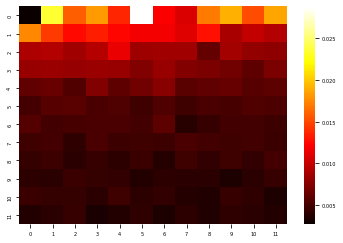

In [78]:
import seaborn as sns
sns.heatmap(rfc_model.feature_importances_.reshape(12,12), cmap = 'hot')

Looking at the above results it looks like, the first 3-4 rows of pixel only have the higher importance for predicting the test output and others have relevent importnace. Hence it is not easy to predict the data.  

# 4.Ensamble learning

In [79]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [80]:
# we will use the 3 models to do the ensamble learning
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', C=MLR_parameters['C'], penalty=MLR_parameters['penalty'], n_jobs= -1)
svm_polynomial = SVC(kernel='poly', C = SVM_polynomial_parameters['C'], degree=SVM_polynomial_parameters['degree'], coef0=SVM_polynomial_parameters['coef0'],probability=True, max_iter = 10000)
rfc_model = RandomForestClassifier(n_estimators=rfc_parameters['n_estimators'], 
                             max_depth=rfc_parameters['max_depth'], 
                             min_samples_leaf = rfc_parameters['min_samples_leaf'], 
                             min_samples_split = rfc_parameters['min_samples_split'], 
                             n_jobs= -1)

#### first of all, we will use hard voting technique to observe the results

### Hard Voting

In [81]:
voting_classifier = VotingClassifier(estimators=[('logistic_regression', logistic_reg_model), 
                                                 ('svm', svm_polynomial), 
                                                 ('randomforest', rfc_model)], voting='hard')

In [82]:
%%time 
voting_classifier.fit(train_data, train_labels)

CPU times: user 1min 4s, sys: 1.74 s, total: 1min 5s
Wall time: 2min 23s


VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=0.5,
                                                 multi_class='multinomial',
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga')),
                             ('svm',
                              SVC(C=0.5, coef0=1, kernel='poly', max_iter=10000,
                                  probability=True)),
                             ('randomforest',
                              RandomForestClassifier(n_estimators=50,
                                                     n_jobs=-1))])

In [83]:
test_labels_pred = voting_classifier.predict(test_data)

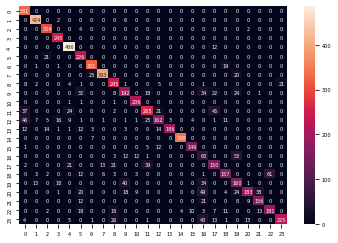

In [84]:
#plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [85]:
# printing scores
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.8143048665858115
Precision Score: 0.8013106525376464
Recall Score: 0.8013106525376464
F1 Score: 0.8002108293131937


#### Now, we will use soft voting technique to observe the evaluation metrics

### Soft Voting

In [86]:
# Create an ensemble of the three classifiers
voting_classifier = VotingClassifier(estimators=[('logistic_regression', logistic_reg_model), 
                                                 ('svm', svm_polynomial),
                                                 ('randomforest', rfc_model)], 
                                     voting='soft')

In [87]:
%%time 
voting_classifier.fit(train_data, train_labels)

CPU times: user 1min 29s, sys: 2.65 s, total: 1min 31s
Wall time: 2min 55s


VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=0.5,
                                                 multi_class='multinomial',
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga')),
                             ('svm',
                              SVC(C=0.5, coef0=1, kernel='poly', max_iter=10000,
                                  probability=True)),
                             ('randomforest',
                              RandomForestClassifier(n_estimators=50,
                                                     n_jobs=-1))],
                 voting='soft')

In [88]:
# predicting test labels
test_labels_pred = voting_classifier.predict(test_data)

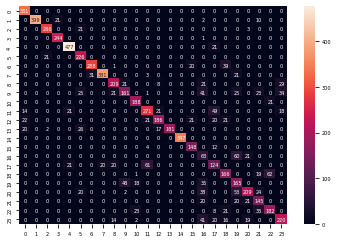

In [89]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [90]:
# printing scores
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.7966186122220679
Precision Score: 0.7803959843837145
Recall Score: 0.7803959843837145
F1 Score: 0.7835936481821744


Hard voting is giving slightly high accuracy than the Soft voating

# Conclusion:

1. The hyperparameters hugely affect the efficiency of the model. 
2. Some models require high regularization paramets while some require low hyper parameters
3. In terms of efficiency and reasonalble accuracy, Random forest alone works the best.
4. Ensamble learning is a methodology of using multiple best fitted algorithms on the training data to give the model with highest accuracy. 
5. Softvoting has higher accuracy results than hard voting ensemble model

## More things we wanted to do

1. We have tested the models on limited no of parameters, an extensive search could be done.
2. We have used grid search to find the best fitted parameters within given arbitrarily chosen values. After finding the best fitted values, we would have loved to test how the efficiency and accuracy varies with smaller increase or decrease in hyperparameters.  
3. For the results, we have plotted only the confusion matrix. I would love to check how the validation curve varies as we tune the hyperparameters.

# References:

[1] Geron, A. (2019). Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly Media.

[2] API Reference. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/classes.html

[3] API Reference. (n.d.). Pandas. https://pandas.pydata.org/docs/user_guide/index.html

[4] API Reference. (n.d.). NumPy. https://numpy.org/doc/stable/user/index.html#user

[5] Some inference from notebooks on https://github.com/ageron/handson-ml3